In [35]:
import numpy as np

class SOM:
    def __init__(self, input_dim=84, output_nodes=100, learning_rate=0.2, epochs=20, neighbor_max = 50):
        self.input_dim = input_dim
        self.output_nodes = output_nodes
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.neighbor_max = neighbor_max
        self.weights = np.random.rand(output_nodes, input_dim)

    def fit(self, X):
        for epoch in range(self.epochs):
            neighborhood_size = int(self.neighbor_max *(1 - (epoch +0.01)/ self.epochs))
            for x in X:
                winner_idx = self.get_winner(x)
                self.update_weights(x, winner_idx, neighborhood_size)

    def get_winner(self, x):
        distances = np.linalg.norm(self.weights - x, axis=1)
        return np.argmin(distances)

    def update_weights(self, x, winner_idx, neighborhood_size):
        for i in range(self.output_nodes):
            distance = abs(i - winner_idx)
            if distance < neighborhood_size:
                h = np.exp(-distance ** 2 / (2 * (neighborhood_size ** 2)))
                self.weights[i] += self.learning_rate *h * (x - self.weights[i])

    def map_animals(self, X):
        winneridx_list = np.array([self.get_winner(x) for x in X])# id is the animal
        sorted_indices = np.argsort(winneridx_list)# the order of the animals
        return sorted_indices, winneridx_list[sorted_indices]


In [36]:
animals = np.loadtxt("data_lab2/animals.dat",delimiter=",")
animals = animals.reshape((32, 84))
print(animals.shape)

animals_names = np.loadtxt("data_lab2/animalnames.txt",dtype=str)
print(animals_names.shape)

(32, 84)
(32,)


In [37]:
#parameters
input_dim = 84
output_nodes = 100
learning_rate = 0.2
epochs = 20
neighbor_max = 50


som = SOM(input_dim, output_nodes, learning_rate, epochs, neighbor_max)
som.fit(animals)

In [39]:
sorted_indices, som_list = som.map_animals(animals)

sorted_animals = animals_names[sorted_indices]
print(som_list)
for i, name in enumerate(sorted_animals, start=1):
    print(f"{som_list[i-1]}. {name}", end="\t")
    if i % 5 == 0:
        print() 

[ 0  0  2  4  6 10 12 14 19 21 25 29 33 33 38 40 42 49 56 56 60 67 69 74
 76 84 91 93 95 97 99 99]
0. 'giraffe'	0. 'camel'	2. 'pig'	4. 'horse'	6. 'antelop'	
10. 'kangaroo'	12. 'rabbit'	14. 'elephant'	19. 'bat'	21. 'rat'	
25. 'skunk'	29. 'ape'	33. 'cat'	33. 'lion'	38. 'dog'	
40. 'hyena'	42. 'bear'	49. 'walrus'	56. 'crocodile'	56. 'seaturtle'	
60. 'frog'	67. 'penguin'	69. 'ostrich'	74. 'pelican'	76. 'duck'	
84. 'spider'	91. 'moskito'	93. 'housefly'	95. 'butterfly'	97. 'dragonfly'	
99. 'beetle'	99. 'grasshopper'	

#  Cyclic Tour

In [43]:
with open("data_lab2/cities.dat", "r") as file:
    lines = file.readlines()
cleaned_lines = [line.replace(";", "").strip() for line in lines if not line.startswith("%")]
cities = np.loadtxt(cleaned_lines, delimiter=",")
print(cities)

[[0.4    0.4439]
 [0.2439 0.1463]
 [0.1707 0.2293]
 [0.2293 0.761 ]
 [0.5171 0.9414]
 [0.8732 0.6536]
 [0.6878 0.5219]
 [0.8488 0.3609]
 [0.6683 0.2536]
 [0.6195 0.2634]]


In [65]:
class SOM2:
    def __init__(self, input_dim, output_nodes, learning_rate=0.2, epochs=20, neighbor_max =2):
        self.input_dim = input_dim
        self.output_nodes = output_nodes
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.neighbor_max = neighbor_max
        self.weights = np.random.rand( output_nodes,input_dim)

    def fit(self, X):
        for epoch in range(self.epochs):
            lambd = np.log(self.neighbor_max) / self.epochs
            neighborhood_size = max(1, int(self.neighbor_max * np.exp(-lambd * epoch)))
            #neighborhood_size = int(self.neighbor_max *(1 - (epoch +0.01)/ self.epochs))
            for x in X:
                winner_idx = self.get_winner(x)
                self.update_weights(x, winner_idx, neighborhood_size)

    def get_winner(self, x):
        distances = np.linalg.norm(self.weights - x, axis=1)
        return np.argmin(distances)

    def update_weights(self, x, winner_idx, neighborhood_size):
        for i in range(self.output_nodes):
            distance = min(abs(i - winner_idx), output_nodes - abs(i - winner_idx))
            if distance < neighborhood_size:
                h = np.exp(-distance ** 2 / (2 * (neighborhood_size ** 2)))
                self.weights[i] += self.learning_rate *h * (x - self.weights[i])

    def map_city(self, X):
        winneridx_list = np.array([self.get_winner(x) for x in X])
        sorted_indices = np.argsort(winneridx_list)
        return sorted_indices, self.weights[sorted_indices]


[[0.22814967 0.75780954]
 [0.40081125 0.44507862]
 [0.51927434 0.93710328]
 [0.20323563 0.19243082]
 [0.86749138 0.64934246]
 [0.84910913 0.36082518]
 [0.68181955 0.51878304]
 [0.59054728 0.0739222 ]
 [0.66825788 0.25329124]
 [0.61914161 0.26310168]]


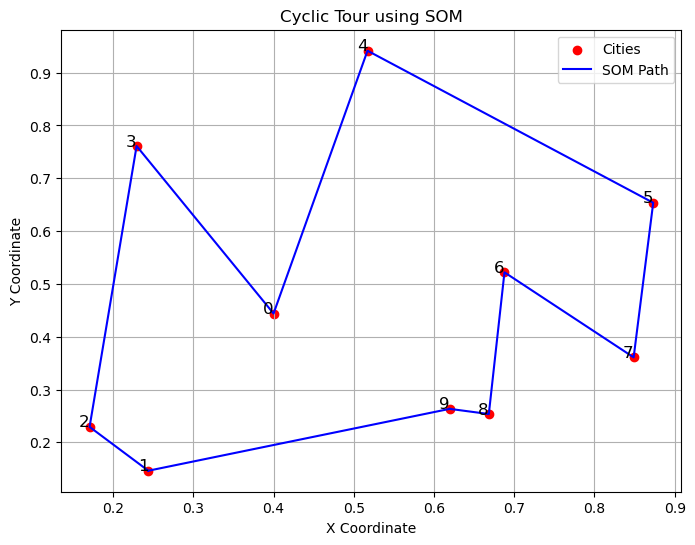

Final city order in the SOM path:
[1 2 3 0 4 5 7 6 8 9]


In [67]:
#parameters
import matplotlib.pyplot as plt

input_dim = 2
output_nodes = 10

som2 = SOM2(input_dim, output_nodes, learning_rate=0.2, epochs=20, neighbor_max=2)
som2.fit(cities)

sorted_indices, weight_list= som2.map_city(cities)

print(weight_list)
ordered_weights = cities[sorted_indices]

plt.figure(figsize=(8, 6))
plt.scatter(cities[:, 0], cities[:, 1], color="red", label="Cities")
plt.plot(ordered_weights[:, 0], ordered_weights[:, 1], "b-", label="SOM Path")
plt.plot([ordered_weights[-1, 0], ordered_weights[0, 0]], [ordered_weights[-1, 1], ordered_weights[0, 1]], "b-")


for i, city in enumerate(cities):
    plt.text(city[0], city[1], str(i), fontsize=12, ha="right")

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Cyclic Tour using SOM")
plt.legend()
plt.grid()
plt.show()

print(sorted_indices)

# Data Clustering: Votes of MPs

In [72]:
votes = np.loadtxt("data_lab2/votes.dat",delimiter=",").reshape((349, 31))


31


In [74]:
missing_votes = np.sum(votes == 0.5)
missing_votes

2815

In [77]:
import numpy as np
import matplotlib.pyplot as plt

class SOM3:
    def __init__(self, input_dim, output_grid=(10, 10), learning_rate=0.5, epochs=100):
        self.input_dim = input_dim
        self.output_grid = output_grid
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.neighbor_max = output_grid[0]*output_grid[1] / 20
        self.weights = np.random.rand(output_grid[0], output_grid[1], input_dim)
    
    def get_winner(self, x):
        distances = np.linalg.norm(self.weights - x, axis=2)
        return np.unravel_index(np.argmin(distances), distances.shape)

    def update_weights(self, x, winner_idx, neighborhood_size):
        for row in range(self.output_grid[0]):
            for col in range(self.output_grid[1]):
                distance = np.linalg.norm(np.array([row, col]) - np.array(winner_idx))
                if distance < neighborhood_size:
                    h = np.exp(-distance ** 2 / (2 * (neighborhood_size ** 2)))
                    self.weights[row, col] += self.learning_rate * h * (x - self.weights[row, col])
    
    def fit(self, X):
        for epoch in range(self.epochs):
            lambd = np.log(self.neighbor_max) / self.epochs
            neighborhood_size = max(1, int(self.neighbor_max * np.exp(-lambd * epoch)))
            for x in X:
                winner_idx = self.get_winner(x)
                self.update_weights(x, winner_idx, neighborhood_size)

    def map_grid(self, X):
        winneridx_list = np.array([self.get_winner(x) for x in X])  # (N, 2)
    
        return X, winneridx_list


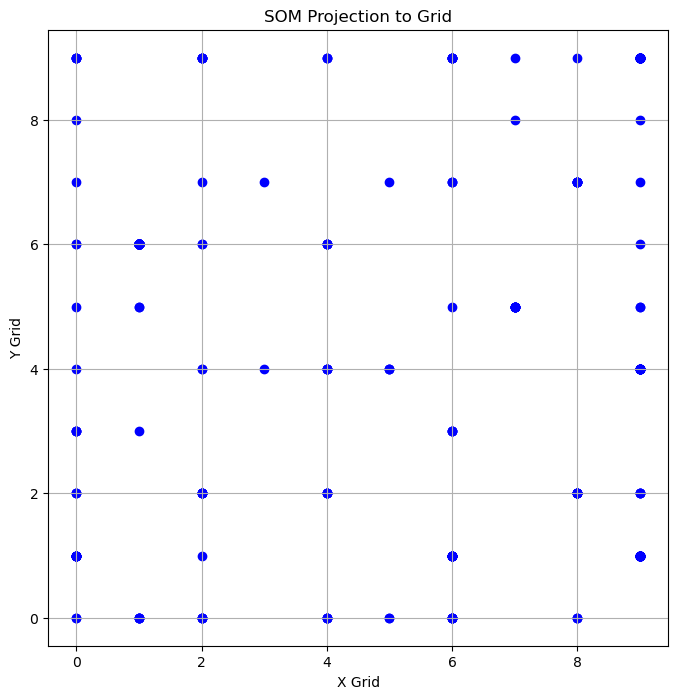

In [ ]:
#parameters
input_dim = 31
output_grid = (10, 10)
learning_rate = 0.2
epochs = 20

som3 = SOM3(input_dim, output_grid, learning_rate, epochs)
som3.fit(votes)

X_mapped, grid_positions = som3.map_grid(votes)

plt.figure(figsize=(8, 8))
plt.scatter(grid_positions[:, 0], grid_positions[:, 1], c='b')
plt.xlabel("X Grid")
plt.ylabel("Y Grid")
plt.title("SOM Projection to Grid")
plt.grid(True)
plt.show()


different parties

In [86]:
with open("data_lab2/mpparty.dat", "r") as file:
    lines = file.readlines()
cleaned_lines = [line.replace(";", "").strip() for line in lines if not line.startswith("%")]
parties = np.loadtxt(cleaned_lines)
print(max(parties))


7.0


In [91]:
grid_positions.shape

(349, 2)

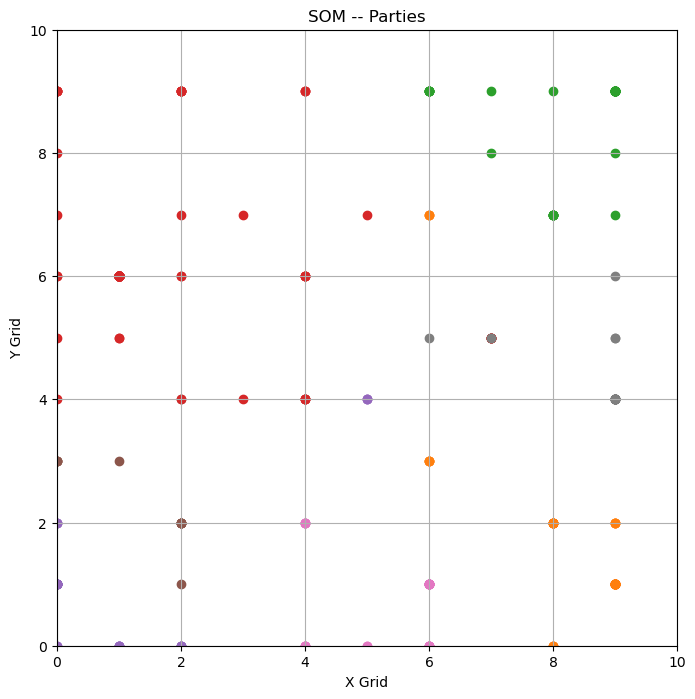

In [92]:
import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS.values())

plt.figure(figsize=(8, 8))

for i in range(len(parties)):
    party_color = colors[int(parties[i])]
    plt.scatter(grid_positions[i, 0], grid_positions[i, 1], c=party_color, label=f"Party {parties[i]}")

plt.xlim([0, 10])
plt.ylim([0, 10])
plt.xlabel("X Grid")
plt.ylabel("Y Grid")
plt.title("SOM -- Parties")
plt.grid()
plt.show()


gender

In [93]:
with open("data_lab2/mpsex.dat", "r") as file:
    lines = file.readlines()
cleaned_lines = [line.replace(";", "").strip() for line in lines if not line.startswith("%")]
genders = np.loadtxt(cleaned_lines)
print(max(genders))

1.0


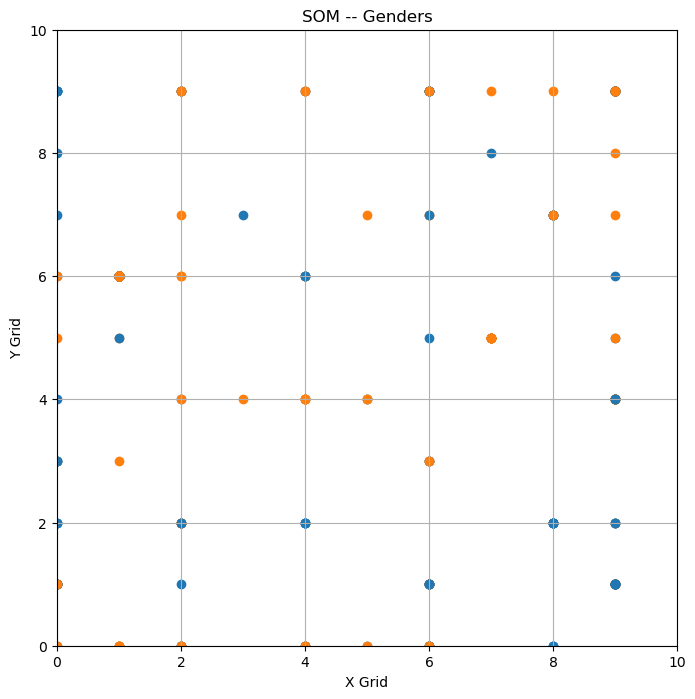

In [94]:
import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS.values())

plt.figure(figsize=(8, 8))

for i in range(len(genders)):
    gender_color = colors[int(genders[i])]
    plt.scatter(grid_positions[i, 0], grid_positions[i, 1], c=gender_color, label=f"Gender {genders[i]}")

plt.xlim([0, 10])
plt.ylim([0, 10])
plt.xlabel("X Grid")
plt.ylabel("Y Grid")
plt.title("SOM -- Genders")
plt.grid()
plt.show()


In [98]:
with open("data_lab2/mpdistrict.dat", "r") as file:
    lines = file.readlines()
cleaned_lines = [line.replace(";", "").strip() for line in lines if not line.startswith("%")]
districts = np.loadtxt(cleaned_lines)
set(districts)

{1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0}

C:\Users\25954\AppData\Local\Temp\ipykernel_46140\2949698205.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("tab20", num_districts)
C:\Users\25954\AppData\Local\Temp\ipykernel_46140\2949698205.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(grid_positions[i, 0], grid_positions[i, 1], c=district_color, label=f"Districts {districts[i]}")


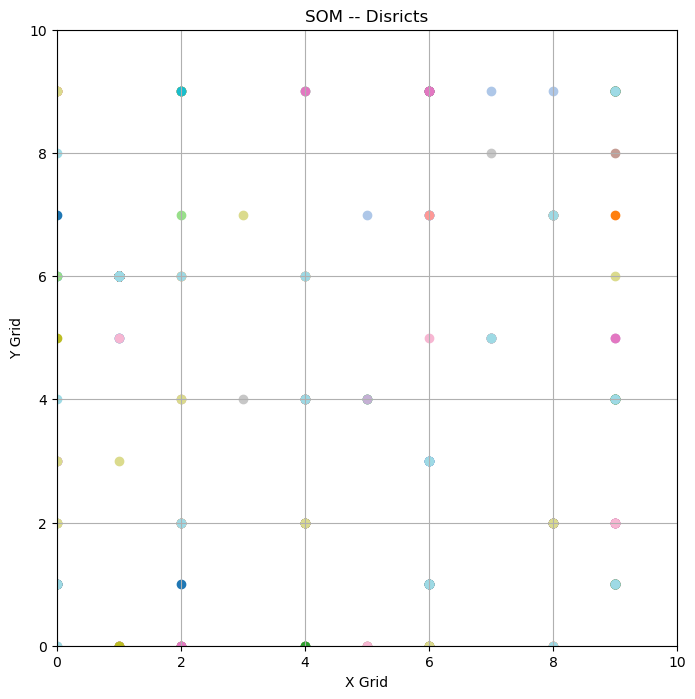

In [100]:
import matplotlib.cm as cm
num_districts = len(set(districts))
cmap = cm.get_cmap("tab20", num_districts) 


plt.figure(figsize=(8, 8))
for i in range(len(districts)):
    district_color = cmap(districts[i] / num_districts)
    plt.scatter(grid_positions[i, 0], grid_positions[i, 1], c=district_color, label=f"Districts {districts[i]}")

plt.xlim([0, 10])
plt.ylim([0, 10])
plt.xlabel("X Grid")
plt.ylabel("Y Grid")
plt.title("SOM -- Disricts")
plt.grid()
plt.show()
